In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import itertools

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\terry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data = pd.read_csv('full_train.csv', on_bad_lines = 'skip', encoding = 'latin-1')
data.drop(['Unnamed: 0'], axis=1, inplace=True)

#np.random.seed(10)
#remove_n = 9000
#drop_indices = np.random.choice(data.index, remove_n, replace=False)
#data = data.drop(drop_indices)

def remove_html(string):
    return regex.sub('', string)
regex = re.compile(r'<[^>]+>')

In [31]:
for i, row in data.iterrows():
    data.at[i,'review'] = remove_html(data.at[i, 'review'])

In [32]:
data.head()

,review,category
0,I like the shepherd! Sure the acting wasn ' t ...,0
1,"Girst off, I ' m an American - - I haven ' t s...",1
2,I'm a sucker for a decent superhero movie. (I'...,0
3,D4ad Gentlemen Productionx has put togethdr a ...,1
4,I have decided to flusJ this show from my m#mo...,1


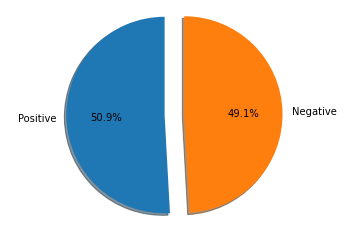

In [33]:
# generate a pie chart showing the distribution of the two classes
pos_size = data[data['category']==1].shape[0]
neg_size = data[data['category']==0].shape[0]
labels = 'Positive', 'Negative'
sizes = [pos_size, neg_size]
explode = (0.2, 0)  # only "explode" the 1st slice (i.e. 'Spam')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
def generateCorpus(data):
    corpus = []
    for i in range(0, len(data)): # iterates through all texts
        # substitute anything that's not a letter (i.e.punctuations) with space
        text = re.sub('[^a-zA-Z][0-9]', ' ', data['review'].iloc[i])

        # convert to lowercase
        text = text.lower()

        # split the text into a list of individual words
        text = text.split()
        ps = PorterStemmer() # python library for stemming words

        # create list to store the stemmed words
        stemmedWord = []
        for word in text:
            if not word in set(stopwords.words('english')): # ignore stopwords
                stemmedWord.append(ps.stem(word))

        # join the words in stemmedWord list back together to form a string (with spaces between them)
        text = ' '.join(stemmedWord)

        # add the processed text to corpus 
        corpus.append(text)
    return corpus

In [35]:
posCorpus = generateCorpus(data[data['category']==1])
negCorpus = generateCorpus(data[data['category']==0])

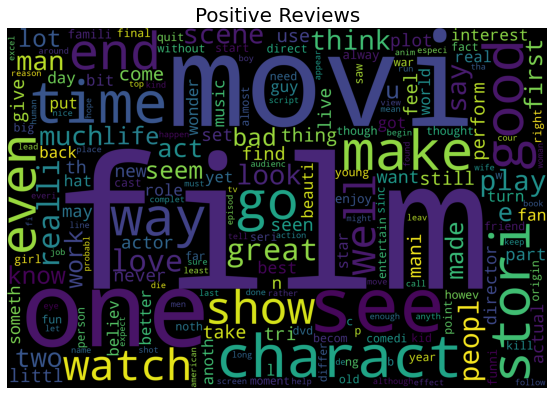

In [36]:
text = ' '.join(posCorpus)
fig_wordcloud = WordCloud(width = 3000, height = 2000).generate(text)
plt.figure(figsize=(15,5), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Positive Reviews", fontsize=20)
plt.show()

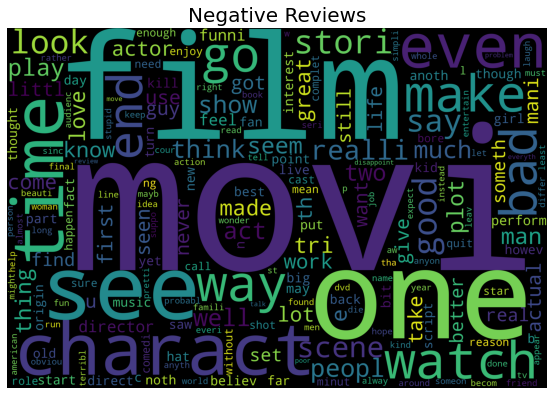

In [37]:
text = ' '.join(negCorpus)
fig_wordcloud = WordCloud(width = 3000, height = 2000).generate(text)
plt.figure(figsize=(15,5), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Negative Reviews", fontsize=20)
plt.show()

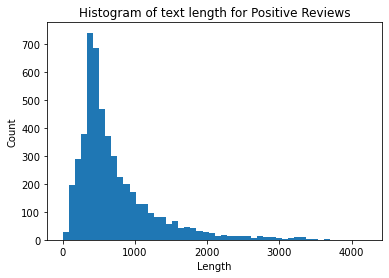

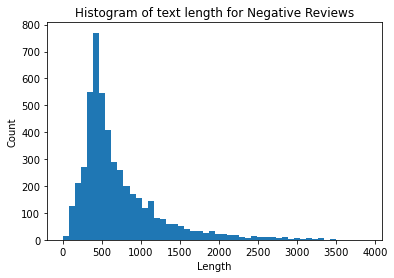

In [38]:
# histogram of length of the messages for the class 'Positive'

posCorpusLengths = (lambda x:[len(i) for i in x])(posCorpus)
plt.hist(posCorpusLengths, 50)
plt.title('Histogram of text length for Positive Reviews')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# histogram of length of the messages for the class 'Negative'
negCorpusLengths = (lambda x:[len(i) for i in x])(negCorpus)
plt.hist(negCorpusLengths, 50)
plt.title('Histogram of text length for Negative Reviews')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

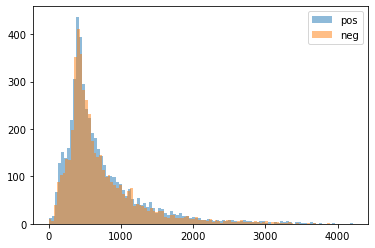

In [39]:
plt.hist(posCorpusLengths, bins=100, alpha=0.5, label='pos')
plt.hist(negCorpusLengths, bins=100, alpha=0.5, label='neg')
plt.legend(loc='upper right')
plt.show()

In [40]:
len(posCorpus)

5087